## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_dim, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_neurons):
      if i == 0:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
        hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
      else:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(hidden_layer)
        hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(hidden_layer)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
learning_rate = 1e-4
batch_set = [32, 128, 256, 512, 1024]
epochs = 50
momontum = 0.95

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in batch_set:
  keras.backend.clear_session()
  print('batch_size:{}'.format(batch_size))
  model = build_mlp(input_dim=x_train.shape[1:])
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
  
  train_loss = model.history.history['loss']
  train_acc = model.history.history['accuracy']
  val_loss = model.history.history['val_loss']
  val_acc = model.history.history['val_accuracy']

  name = 'batch_size:{}'.format(batch_size)
  results[name] = {'train_loss':train_loss, 
                   'val_loss':val_loss, 
                   'train_acc':train_acc, 
                   'val_acc':val_acc}

batch_size:32
Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9648 - accuracy: 0.3252 - val_loss: 1.7591 - val_accuracy: 0.3798
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5828 - accuracy: 0.4430 - val_loss: 1.6412 - val_accuracy: 0.4189
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5047 - accuracy: 0.4667 - val_loss: 1.6944 - val_accuracy: 0.4171
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4324 - accuracy: 0.4893 - val_loss: 1.5069 - val_accuracy: 0.4648
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3865 - accuracy: 0.5096 - val_loss: 1.5065 - val_accuracy: 0.4690
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3382 - accuracy: 0.5288 - val_loss: 1.4879 - val_accuracy: 0.4779
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3164 - accuracy: 0.5343 - val_loss: 1.4316 -

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'orange']

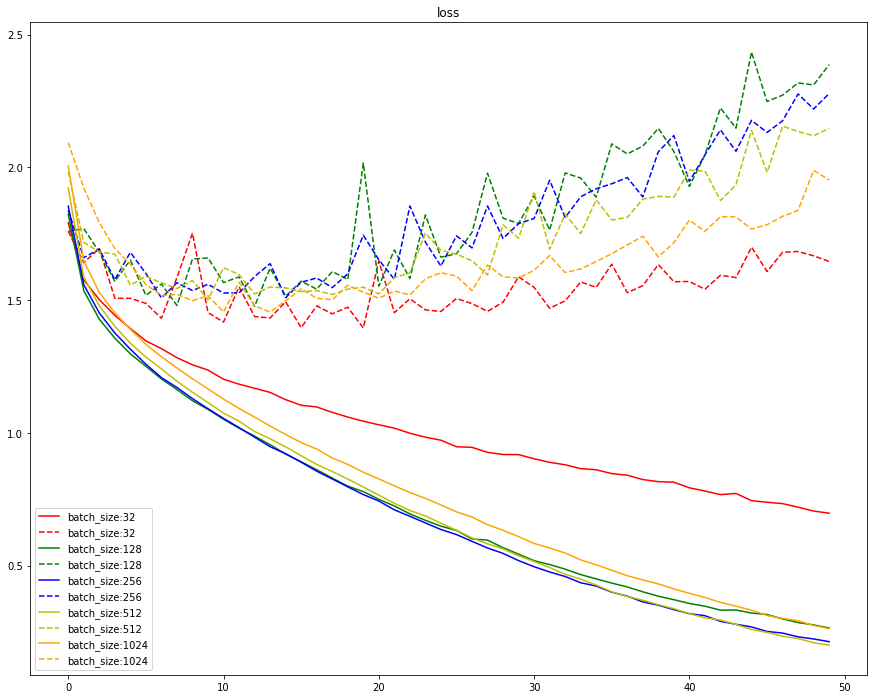

In [14]:
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', color = color_bar[i], label = cond)
plt.title('loss')
plt.legend(loc = 'best')
plt.show()

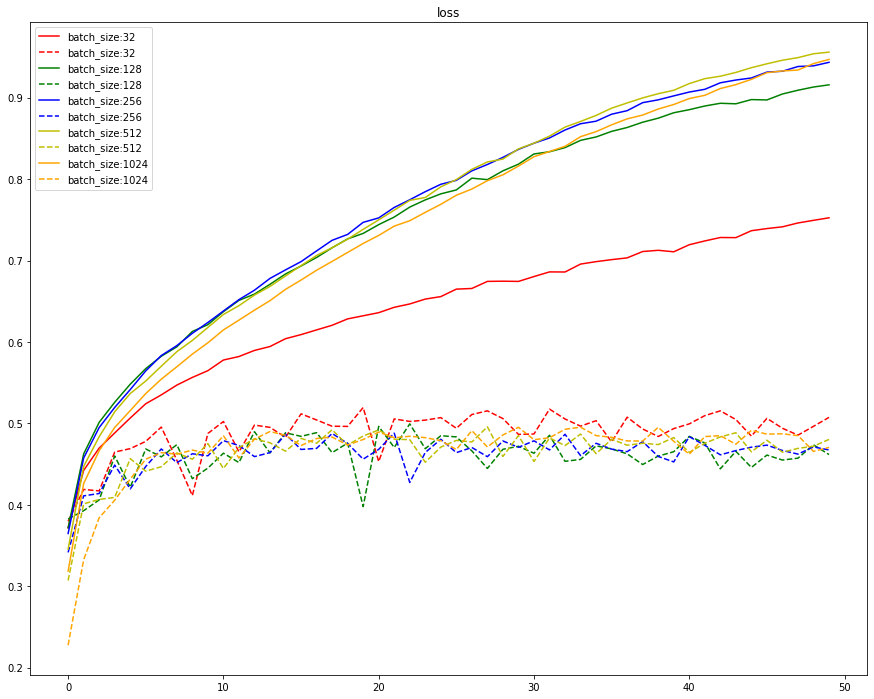

In [15]:
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', color = color_bar[i], label = cond)
plt.title('acc')
plt.legend(loc = 'best')
plt.show()

In [16]:
def build_mlp_activate(input_dim, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_units in enumerate(num_neurons):
      if i == 0:
        hidden_layer = keras.layers.Dense(units=n_units, name='hidden_layer_{}'.format(i+1))(input_layer)
        hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
        hidden_layer = keras.layers.Activation('relu')(hidden_layer)
      else:
        hidden_layer = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer_{}'.format(i+1))(hidden_layer)
        hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
        hidden_layer = keras.layers.Activation('relu')(hidden_layer)
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(hidden_layer)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in batch_set:
  keras.backend.clear_session()
  print('batch_size:{}'.format(batch_size))
  model = build_mlp(input_dim=x_train.shape[1:])
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True)
  
  train_loss = model.history.history['loss']
  train_acc = model.history.history['accuracy']
  val_loss = model.history.history['val_loss']
  val_acc = model.history.history['val_accuracy']

  name = 'batch_size:{}'.format(batch_size)
  results[name] = {'train_loss':train_loss, 
                   'val_loss':val_loss, 
                   'train_acc':train_acc, 
                   'val_acc':val_acc}

batch_size:32
Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9713 - accuracy: 0.3247 - val_loss: 1.6743 - val_accuracy: 0.4057
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5820 - accuracy: 0.4460 - val_loss: 1.7746 - val_accuracy: 0.3897
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4951 - accuracy: 0.4715 - val_loss: 1.5542 - val_accuracy: 0.4517
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4306 - accuracy: 0.4919 - val_loss: 1.7446 - val_accuracy: 0.4029
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3705 - accuracy: 0.5165 - val_loss: 1.5228 - val_accuracy: 0.4675
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3497 - accuracy: 0.5271 - val_loss: 1.4448 - val_accuracy: 0.4886
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2988 - accuracy: 0.5438 - val_loss: 1.4414 -

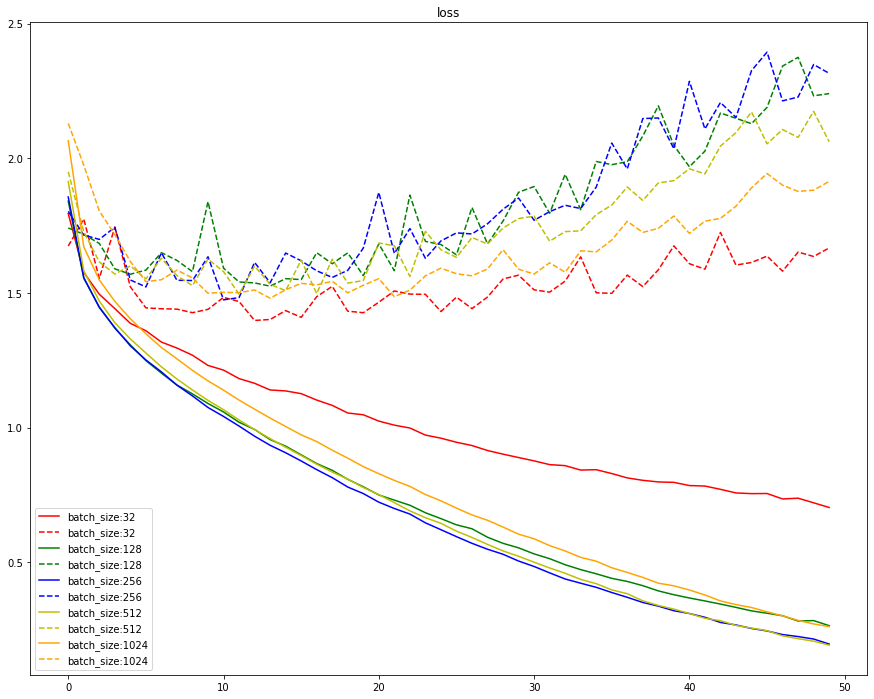

In [19]:
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', color = color_bar[i], label = cond)
plt.title('loss')
plt.legend(loc = 'best')
plt.show()

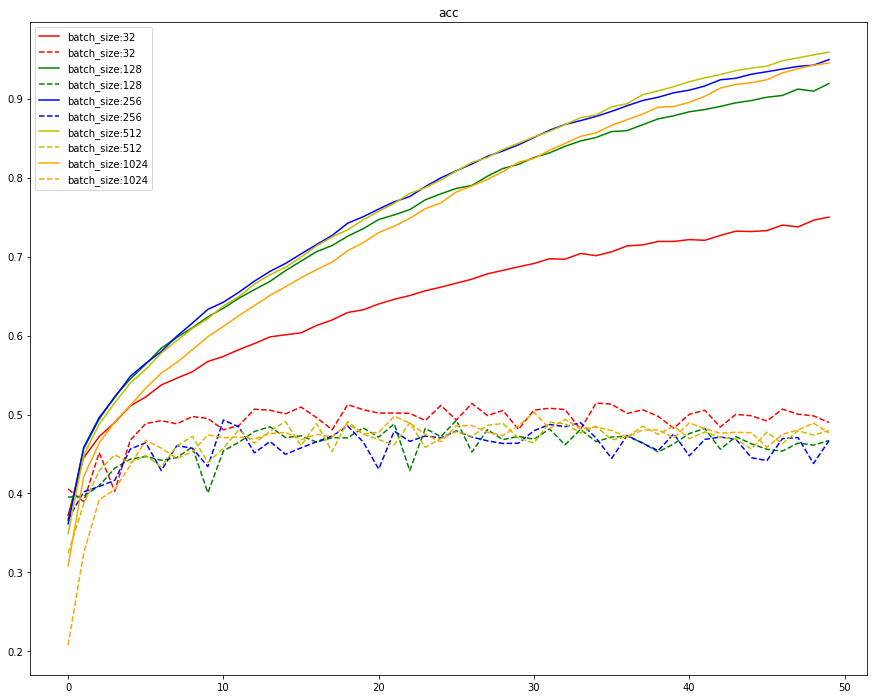

In [18]:
plt.figure(figsize = (15, 12))
for i, cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', color = color_bar[i], label = cond)
  plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', color = color_bar[i], label = cond)
plt.title('acc')
plt.legend(loc = 'best')
plt.show()